In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import sys
sys.path.append('src')
from poisson_disk import PoissonDiskSampler
%aimport settings
import settings
%aimport cnn_utils
import cnn_utils

import numpy as np
import matplotlib
import matplotlib.pylab as plt
sys.path.append(settings.CAFFE_PYTHON_PATH)
import caffe
%matplotlib inline

In [64]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Piosson Disk Sampling

samples size:  39


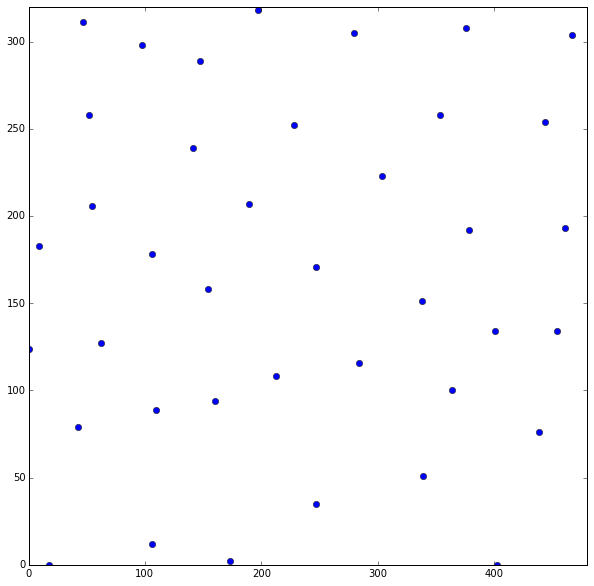

In [65]:
width = 480
height = 320
radius = 50
pds = PoissonDiskSampler(width, height, radius)
samples = pds.get_sample()
print 'samples size: ', len(samples)
xs = [int(s[0]) for s in samples]
ys = [int(s[1]) for s in samples]
plt.plot(xs, ys, 'o')
plt.xlim([0,width])
plt.ylim([0,height])
plt.show()

# Working with Caffe's Net Object

In [12]:
dh = cnn_utils.DeepHelper()

In [16]:
img = caffe.io.load_image('/home/ipl/installs/caffe/examples/images/cat.jpg')

In [51]:
new_size = [1, 3, img.shape[0], img.shape[1]]
dh.transformer.inputs['data'] = new_size
img_pp = dh.transformer.preprocess('data', img)
dh.net.blobs['data'].reshape(*new_size)

dh.net.blobs['data'].data[...] = img_pp

In [54]:
out = dh.net.forward()

In [57]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

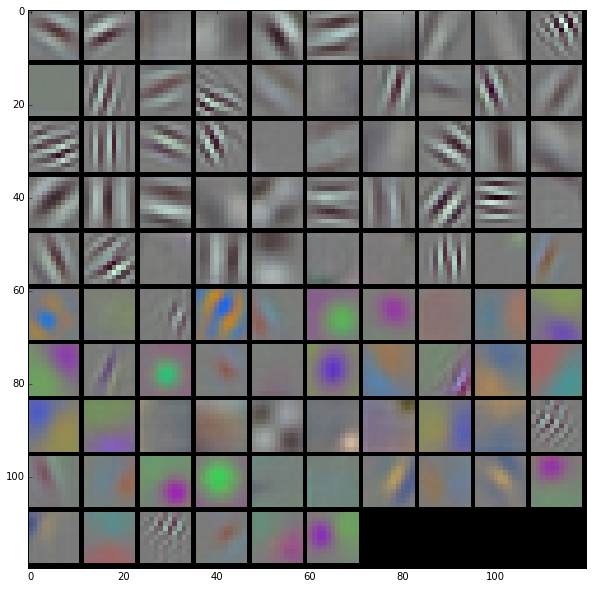

In [66]:
filters = dh.net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

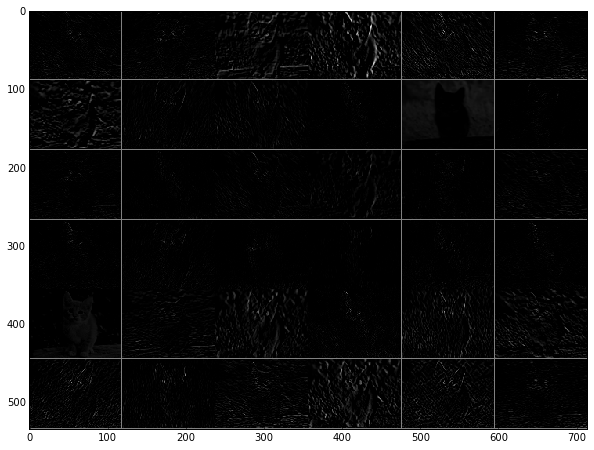

In [69]:
feat = dh.net.blobs['conv1'].data[0, :36]
vis_square(feat, padval=0.5)